# **Customer Segmentation Analysis**
## Objective:
Develop a data-driven customer segmentation model to help the marketing team tailor their strategies based on different customer segments.

## Project Overview:
This project report provides a comprehensive analysis of customer segmentation using machine learning techniques. The objective was to develop a model that segments customers based on sales trends,Customers purchasing pattern,demographics allowing for more targeted marketing strategies. The project utilizes the Customer Personality Analysis dataset from Kaggle.

***
***

## **Data Pre-processing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import minmax_scaling
import scipy.cluster.hierarchy as shc
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print('Percentage of data missing:',round(percent_missing, 2))

Percentage of data missing: 3.15


### ***Insights***
Nearly a 100k values are missing from the customerID column. We will drop these rows as they are not useful for our analysis.

Since CustomerID isn't something we can fill, we'll just have to delete the rows where customerID is missing

In [ ]:
# Deleting the rows where CustomerID is missing

df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
print('Number of Duplicate values:', df.duplicated().sum())

Number of Duplicate values: 5225


In [ ]:
#Deleting all the duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
print('Rechecking Number of Duplicate values:', df.duplicated().sum())
print('Currently there are', df.shape[0], 'rows and', df.shape[1], 'columns in the dataset')

Rechecking Number of Duplicate values: 0
Currently there are 401604 rows and 8 columns in the dataset


In [ ]:
#We can see that InvoiceNo feature is numerical, but listed as object datatype, so converting it
# Convert InvoiceNo to numeric, setting errors='coerce' will replace non-numeric values with NaN


#df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

In [ ]:
#Changing the type of InvoiceDate from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df['InvoiceDate'].dtypes)

datetime64[ns]


In [ ]:
#We have to analyze which countries placed the most orders
countries = df['Country'].value_counts()
countries

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


### ***Inights***
We can see that most orders are placed from United Kingdom, so we can safely assume the currency is GBP.
Now, we have to analyze the stock codes, as they're the unique identifiers for each product and have various
alphabets written along the numerals.

For now, we'll look at the most ordered products

C:\Users\Fahad\AppData\Local\Temp\ipykernel_14672\2549202112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


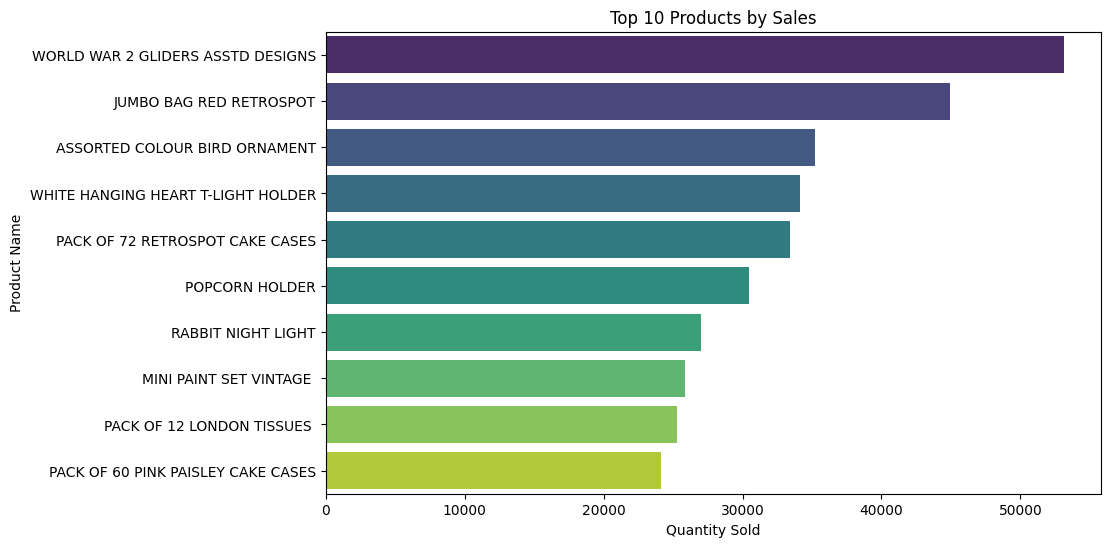

In [ ]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales')
plt.show()

In [ ]:
#No. of products ordered by customer per invoice
orders = df.groupby(by = ['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
products_per_customer = orders.rename(columns = {'InvoiceDate':'Number of Products'})

products_per_customer[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of Products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


***
# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


### ***Insights***
#### Minimum value of Quantity cant be negative - Exploring this anomaly

In [ ]:
#Fetching rows with negative values `Quantity`

df[(df['Quantity'] < 0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


### ***INSIGHTS***
We can observe that InvoiceNo starts with C for entries with negative values in Quantity

As entries with InvoiceNo that start with a "C" have NEGATIVE values in the Quantity column,
therefore we can say that these are cancelled orders.
Creating a new dataframe of cancelled_orders and droping these entries from the main table for analysis.

In [ ]:
#Creating a different dataframe containing only cancelled orders

cancelled_orders = df[df.InvoiceNo.str.startswith("C")]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#dropping rows with negative values in Quantity

df.drop(df[(df['Quantity'] < 0)].index, inplace= True)

In [ ]:
#resetting the index

df.reset_index(drop = True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#checking the number of remaining entries in the dataset
df.shape

(392732, 8)

In [ ]:
#Fetching top 5 most returned product
cancelled_orders[['StockCode', 'Description']].value_counts().head(5).to_frame()

,,count
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,180
M,Manual,175
POST,POSTAGE,97
22960,JAM MAKING SET WITH JARS,86
D,Discount,77


In [ ]:
#Fetching top 5 huge bulk orders that were returned
cancelled_orders.sort_values('Quantity').head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom


In [ ]:
#Fetching top 5 customers to cancel most orders
cancelled_orders['CustomerID'].value_counts().to_frame().head()

,count
CustomerID,
14911.0,226
17841.0,136
17511.0,113
15311.0,112
12607.0,101


### ***INSIGHTS***

These customers can be contacted to understand what made them cancel their orders
in order to prevent such returns in the future.

***
#  ***Sales Trends***

### - ***Finding how does sales revenue vary over time***

In [ ]:
# Calculating daily revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by date and sum revenue
daily_revenue = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum()

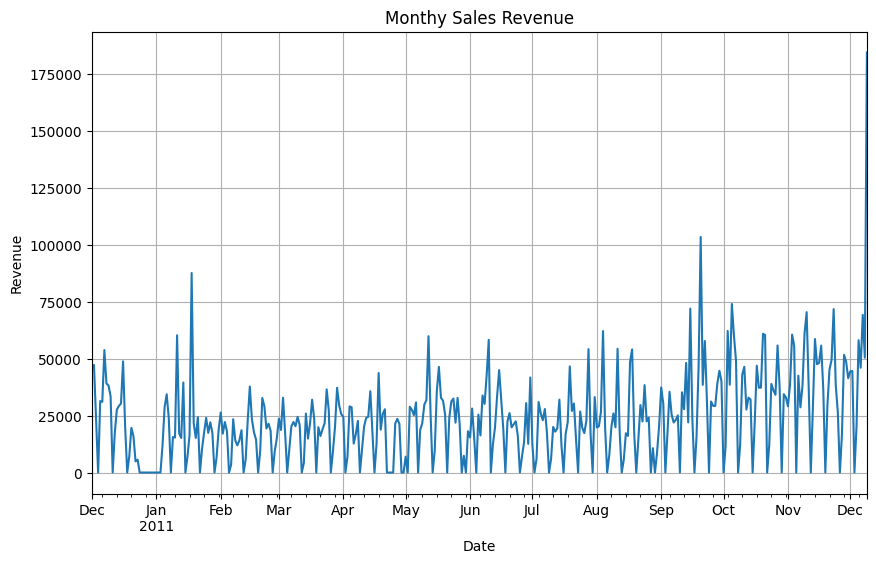

In [ ]:
plt.figure(figsize=(10, 6))

daily_revenue.plot()

plt.title('Monthy Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.grid(True)
plt.show()

***
## ***Customer Purchasing Patterns***

### ***Finding the top customers based on total spending***

In [ ]:
#Revenue generated by each customer
customer_spending = df.groupby('CustomerID')['Revenue'].sum().reset_index()

#Understanding who the topmost customer are
top_customers = customer_spending.sort_values(by='Revenue', ascending=False).head(5)

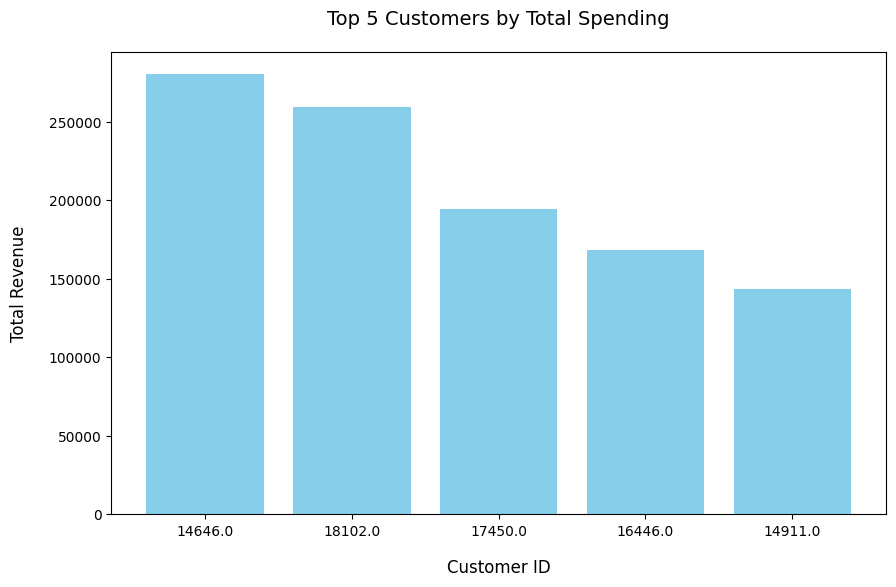

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Revenue'], color='skyblue')

plt.xlabel('Customer ID',fontsize=12,labelpad=15)
plt.ylabel('Total Revenue',fontsize=12,labelpad=15)
plt.title('Top 5 Customers by Total Spending',fontsize=14,pad=20)

plt.show()

***
## **Geographical Transaction Variations**

### ***Finding the countries contribute the most to sales***

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

top_countries = country_revenue.sort_values(by='Revenue', ascending=False).head(5)

In [ ]:
country_revenue

,Country,Revenue
0,Australia,138453.810
1,Austria,10198.680
2,Bahrain,548.400
3,Belgium,41196.340
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20440.540
7,Cyprus,13502.850
8,Czech Republic,826.740
9,Denmark,18955.340


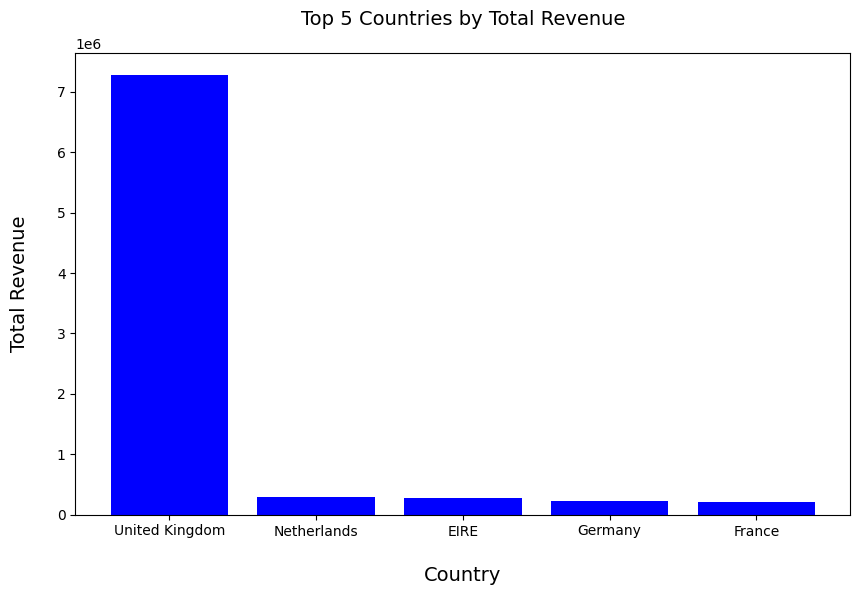

In [ ]:

plt.figure(figsize=(10, 6))

plt.bar(top_countries['Country'], top_countries['Revenue'], color='b')

plt.xlabel('Country',labelpad=20,fontsize=14)
plt.ylabel('Total Revenue',labelpad=20,fontsize=14)
plt.title('Top 5 Countries by Total Revenue',fontsize=14,pad=20)


plt.show()

## **Summary of Findings**
###  **Sales Trends**

#### _Revenue Peaks_ :
   
- From the graph we can clearly observe that one highest peak is around April.This reprsents the period of high sales revenue.
  
- Another highest peak is in September/October & November/December.Which indicates strong sales during the holiday season.Businesses often experience increased revenue during this time due to gift shopping and year-end sales.
  
#### _Revenue Downs_:
- Following the peaks, there are noticeable down in curves. Reason could be related to factors such as reduced consumer spending after the holiday rush or other external influences.

### **Product Popularity**

- The tallest bar represents the DRYER PACKAGE indicating that it generates the highest revenue among the listed products
- JUMBO BAG RED RETROSPOT has the lowest revenue
  
- Marketing team should :
     - Focus on promoting and stocking high-revenue products
     - Explore ways to boost sales for products like JUMBO BAG RED RETROSPOT

### **Customer Purchasing Patterns**

- Customer ID 14646.0 is the top spender with a total revenue just above 250,000.
  This customer significantly outspends the others, indicating they might be a key customer for the business.

- The total revenue from the top 5 customers is skewed towards the top two customers.
  This indicates that the business may rely heavily on a few key customers for a significant portion of its revenue.

### **Geographical Transaction Variations**

- The United Kingdom is the dominant market  with total revenue close to 8 million. This indicates that the majority of the business's revenue comes from the UK.

- The revenues from the Netherlands, EIRE (Ireland), Germany, and France are significantly lower, each contributing a fraction of what the UK does. Their total revenues are barely noticeable in comparison to the UK.

- There is a heavy concentration of revenue in the UK. The business is highly dependent on the UK market, which could pose a risk if market conditions or consumer behavior in the UK change.

- Understanding the preferences and behaviors of customers in the UK versus those in other countries might reveal opportunities for customization and targeted marketing strategies.

***
***

## **Feature Segmentation & Dimensionality Reduction**

- So far, there's no clear target variable in the dataset, hinting towards the data being unsupervised.
  This makes the data hard to assess, as there's no true answer.

- Since we have to perform customer segmentation based on the features given, clustering would remain suitable.

In [ ]:
# Encoding the data first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Selecting the categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

# Encode the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print(df)

['InvoiceNo', 'StockCode', 'Description', 'Country']
        InvoiceNo  StockCode  Description  Quantity         InvoiceDate  \
0               0       3233         3698         6 2010-12-01 08:26:00   
1               0       2643         3706         6 2010-12-01 08:26:00   
2               0       2847          858         8 2010-12-01 08:26:00   
3               0       2795         1804         6 2010-12-01 08:26:00   
4               0       2794         2763         6 2010-12-01 08:26:00   
...           ...        ...          ...       ...                 ...   
541904      18535       1466         2253        12 2011-12-09 12:50:00   
541905      18535       1742          692         6 2011-12-09 12:50:00   
541906      18535       2082          698         4 2011-12-09 12:50:00   
541907      18535       2083          697         4 2011-12-09 12:50:00   
541908      18535       1035          269         3 2011-12-09 12:50:00   

        UnitPrice  CustomerID  Country  Revenu

In [ ]:
#Datetime column can now be dropped, as we have extracted the insights from it
df.drop('InvoiceDate', axis = 1, inplace = True)

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
0,0,3233,3698,6,2.55,17850.0,35,15.30
1,0,2643,3706,6,3.39,17850.0,35,20.34
2,0,2847,858,8,2.75,17850.0,35,22.00
3,0,2795,1804,6,3.39,17850.0,35,20.34
4,0,2794,2763,6,3.39,17850.0,35,20.34
...,...,...,...,...,...,...,...,...
541904,18535,1466,2253,12,0.85,12680.0,13,10.20
541905,18535,1742,692,6,2.10,12680.0,13,12.60
541906,18535,2082,698,4,4.15,12680.0,13,16.60
541907,18535,2083,697,4,4.15,12680.0,13,16.60


In [ ]:
#Implementing MinMaxScaling (between 0 and 1)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaled_data_minmax = df
scaled_data_minmax[numerical_columns] = minmax_scaling(df, columns = numerical_columns)

scaled_df_minmax = pd.DataFrame(scaled_data_minmax)
scaled_df_minmax

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
0,0,3233,3698,0.000062,0.000313,0.926443,35,0.000091
1,0,2643,3706,0.000062,0.000416,0.926443,35,0.000121
2,0,2847,858,0.000086,0.000338,0.926443,35,0.000131
3,0,2795,1804,0.000062,0.000416,0.926443,35,0.000121
4,0,2794,2763,0.000062,0.000416,0.926443,35,0.000121
...,...,...,...,...,...,...,...,...
541904,18535,1466,2253,0.000136,0.000104,0.056219,13,0.000061
541905,18535,1742,692,0.000062,0.000258,0.056219,13,0.000075
541906,18535,2082,698,0.000037,0.000510,0.056219,13,0.000099
541907,18535,2083,697,0.000037,0.000510,0.056219,13,0.000099


In [ ]:
#Implementing Standardized Scaling (values centered around mean with a unit standard deviation)
scaled_data_st = df
scaled_data_st[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

scaled_df_st = pd.DataFrame(scaled_data_st)
scaled_df_st

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
0,0,3233,3698,-0.039395,-0.025880,1.495283,35,-0.023560
1,0,2643,3706,-0.039395,0.011888,1.495283,35,-0.007359
2,0,2847,858,-0.028381,-0.016888,1.495283,35,-0.002023
3,0,2795,1804,-0.039395,0.011888,1.495283,35,-0.007359
4,0,2794,2763,-0.039395,0.011888,1.495283,35,-0.007359
...,...,...,...,...,...,...,...,...
541904,18535,1466,2253,-0.006353,-0.102317,-1.521818,13,-0.039955
541905,18535,1742,692,-0.039395,-0.046113,-1.521818,13,-0.032240
541906,18535,2082,698,-0.050409,0.046060,-1.521818,13,-0.019381
541907,18535,2083,697,-0.050409,0.046060,-1.521818,13,-0.019381


In [ ]:
#Reducing to 4 dimensions
pca = PCA(n_components = 4)
pca_minmax_4 = pca.fit_transform(scaled_data_minmax)

explained_variance = pca.explained_variance_ratio_
print('Explained variance by component:', explained_variance)
print(100*'-')
print("Before PCA:",df.shape,"\nAfter PCA:",pca_minmax_4.shape)
print(100*'-')
pca.components_

Explained variance by component: [9.38985113e-01 3.82361587e-02 2.27771200e-02 1.48303934e-06]
----------------------------------------------------------------------------------------------------
Before PCA: (392732, 8) 
After PCA: (392732, 4)
----------------------------------------------------------------------------------------------------


array([[-9.99892033e-01, -1.37240938e-02, -5.25087500e-03,
         4.71870056e-07,  9.68075170e-07, -2.45010673e-07,
        -1.37054065e-05,  4.18739927e-07],
       [ 4.91394938e-03,  2.44693268e-02, -9.99688500e-01,
        -6.18728233e-07,  1.56251229e-06,  4.24622890e-06,
         8.64078081e-05, -2.00745440e-07],
       [-1.38483050e-02,  9.99606370e-01,  2.43992511e-02,
         7.16486877e-07,  4.47695899e-05,  4.97487010e-06,
         6.40567164e-05,  1.16204728e-05],
       [ 1.32361574e-05,  6.63824701e-05, -8.48424356e-05,
         1.94851536e-03,  2.41176086e-03, -5.86222475e-02,
        -9.98273021e-01,  2.18671147e-03]])

C:\Users\Fahad\AppData\Local\Temp\ipykernel_14672\1640313012.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_minmax_4[:, 0], pca_minmax_4[:, 3], cmap='plasma')


Text(0.5, 1.0, 'PCA with min-max scaling, n_components = 4')

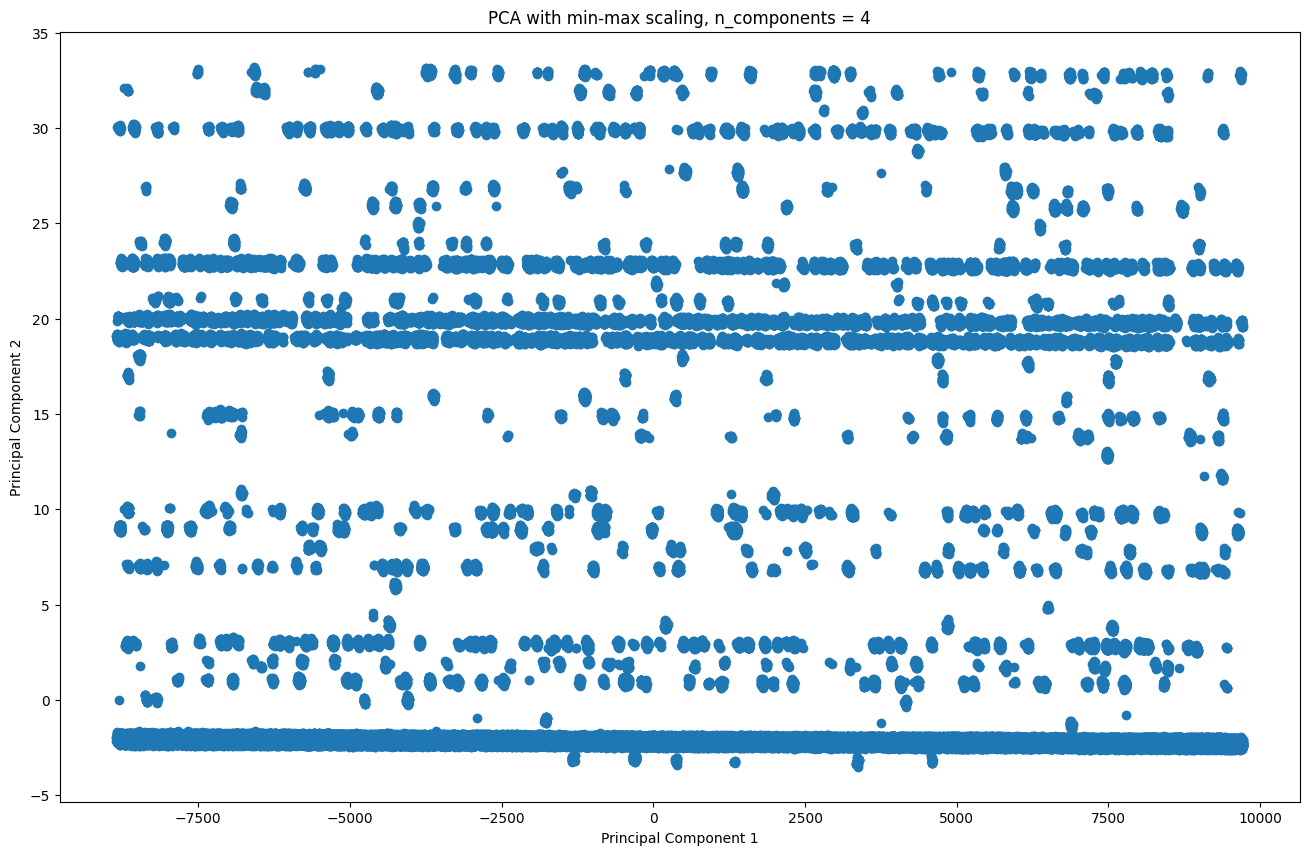

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(pca_minmax_4[:, 0], pca_minmax_4[:, 3], cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with min-max scaling, n_components = 4')


In [ ]:
#Now with n_components = 2
pca2 = PCA(n_components = 2)
pca_minmax_2 = pca2.fit_transform(scaled_df_minmax)


explained_variance = pca.explained_variance_ratio_
print('Explained variance by component:', explained_variance)

# Convert the results to a DataFrame for easy visualization
principal_df = pd.DataFrame(data=pca_minmax_2, columns=['PC1', 'PC2'])

Explained variance by component: [9.38985113e-01 3.82361587e-02 2.27771200e-02 1.48303934e-06]


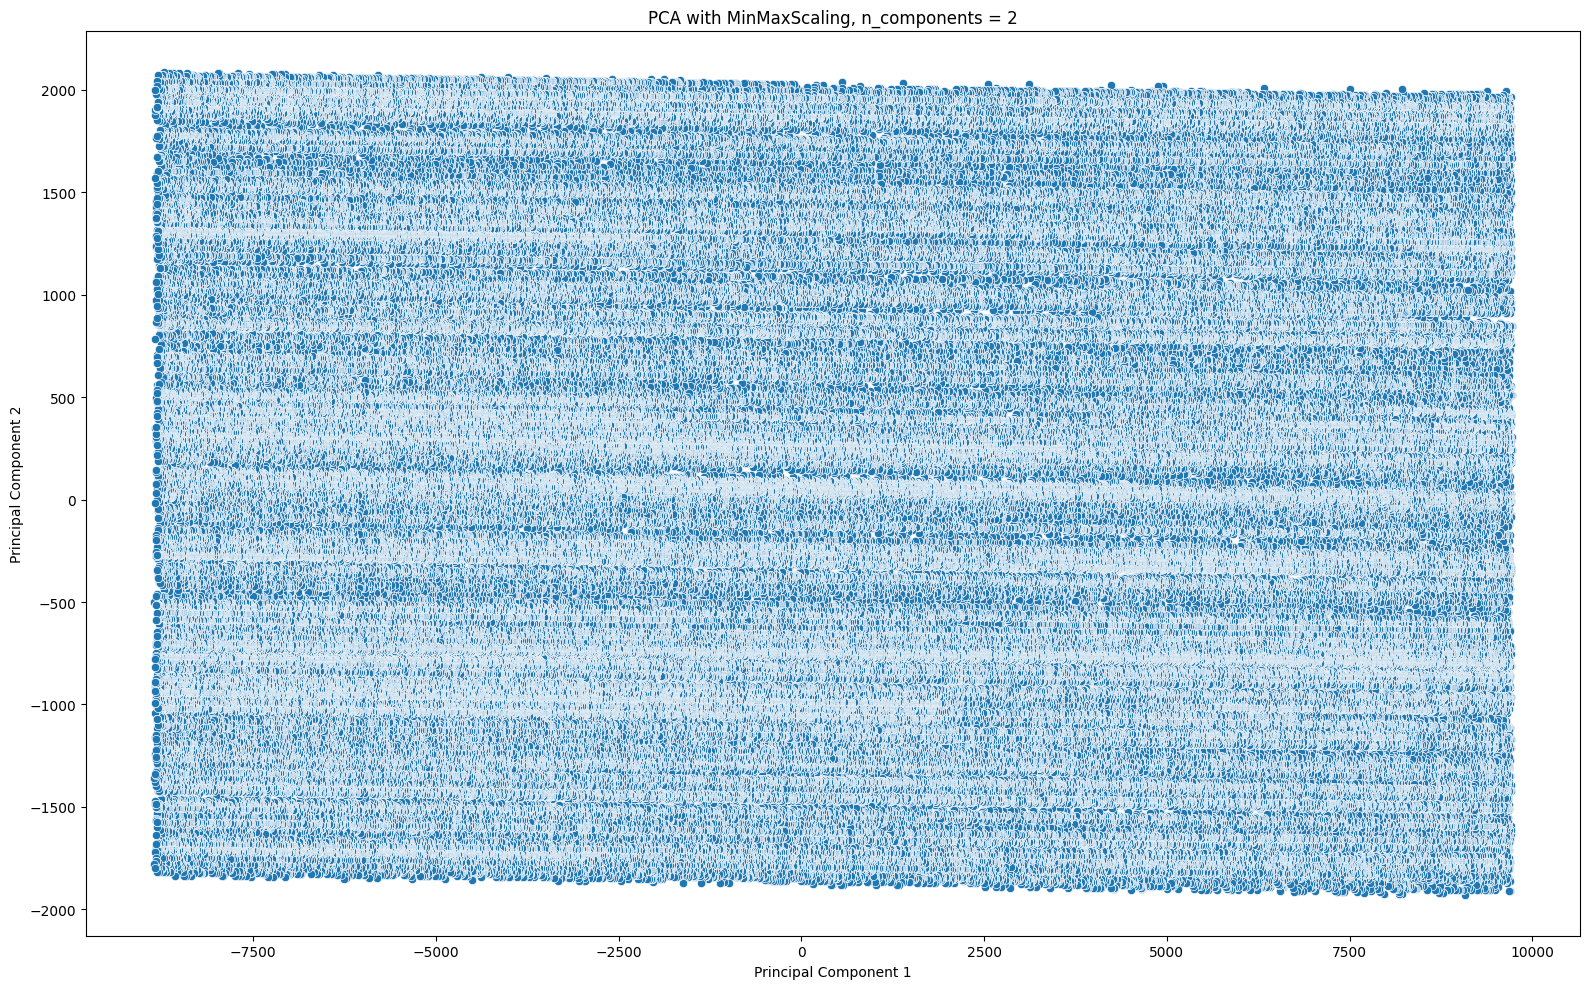

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = principal_df, x = principal_df['PC1'],y = principal_df['PC2'])
plt.title('PCA with MinMaxScaling, n_components = 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

**Cluster Analysis**:
- There is a dense cluster of points around the origin, indicating that most data points have similar values for two principal components.
- This suggests that the majority of the variance in the data is captured within this cluster.

**Outliers**:
- A few points are scattered further away from the center, particularly along the vertical axis.
- These points could be outliers or represent significant variations in the data.

**Variance Explanation**:
- The spread of points along the axes indicates how much variance each principal component explains.
- Principal Component 1 likely explains more variance than Principal Component 2, as it has a wider spread.

## **Model Selection:**

In [ ]:
pca_minmax_2 = pd.DataFrame(pca_minmax_2)
pca_minmax_4 = pd.DataFrame(pca_minmax_4)

#Performing the train-test split
train_minmax_4, test_minmax_4 = train_test_split(pca_minmax_4, train_size=0.75, random_state=42)
train_minmax_2, test_minmax_2 = train_test_split(pca_minmax_2, train_size=0.75, random_state=42)

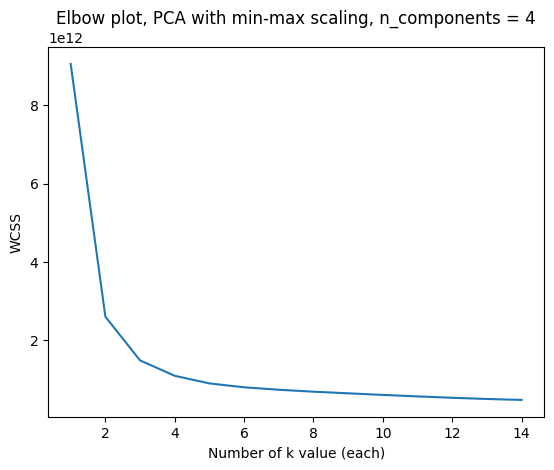

In [ ]:
wcss = []
silhouette_scores = []
for each in range(1, 15):
    kmeans = KMeans(n_clusters=each, n_init = 10)
    kmeans.fit(train_minmax_4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow plot, PCA with min-max scaling, n_components = 4')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

### Result for K-Means, PCA with min-max scaling, n_components = 4
the elbow forms at 3 clusters, with the inertia being 0.175

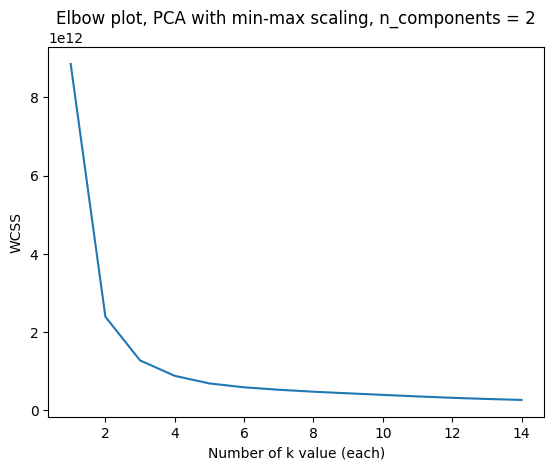

In [ ]:
wcss = []
silhouette_scores = []
for each in range(1, 15):
    kmeans = KMeans(n_clusters=each, n_init = 10)
    kmeans.fit(train_minmax_2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow plot, PCA with min-max scaling, n_components = 2')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

### Result for K-Means, PCA with min-max scaling, n_components = 2
The elbow formed at k = 3 just as previously, with a slight decrease in inertia compared to n_components = 4.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init= 10)
cluster_k = kmeans.fit_predict(pca_minmax_2)

#implementing a seperate DF, signifying which cluster they're a part of
clustered_df_3 = pd.DataFrame(scaled_df_minmax, columns=scaled_df_minmax.columns, index=scaled_df_minmax.index)
clustered_df_3['cluster'] = cluster_k
clustered_df_3.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,cluster
0,0,3233,3698,0.000062,0.000313,0.926443,35,0.000091,1
1,0,2643,3706,0.000062,0.000416,0.926443,35,0.000121,1
2,0,2847,858,0.000086,0.000338,0.926443,35,0.000131,1
3,0,2795,1804,0.000062,0.000416,0.926443,35,0.000121,1
4,0,2794,2763,0.000062,0.000416,0.926443,35,0.000121,1


In [ ]:
clustered_df_3.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,cluster
541904,18535,1466,2253,0.000136,0.000104,0.056219,13,0.000061,2
541905,18535,1742,692,0.000062,0.000258,0.056219,13,0.000075,2
541906,18535,2082,698,0.000037,0.000510,0.056219,13,0.000099,2
541907,18535,2083,697,0.000037,0.000510,0.056219,13,0.000099,2
541908,18535,1035,269,0.000025,0.000608,0.056219,13,0.000088,2


In [ ]:
clustered_df_3['cluster'].value_counts()

cluster
2    145660
1    123839
0    123233
Name: count, dtype: int64

In [ ]:
Calculating Silhoulette Score for the model trained on PCA with n_components = 2

In [ ]:
silhouette_score(pca_minmax_2, cluster_k)

0.5151603285697507

The silhoulette Score calculated was 0.51, which is a good score signifying the clusters being well-formed

Considering this to be enough, I will not be calculating the Silhoulette Score
for the model trained on PCA with n_components = 4, as this alone took 50 minutes.